> # ECOM product prediction

Importing the libraries

In [2]:
import pandas as pd
import sklearn
import numpy as np

Sklearn library for our ML model which has KNN classifier

In [3]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split


The data map

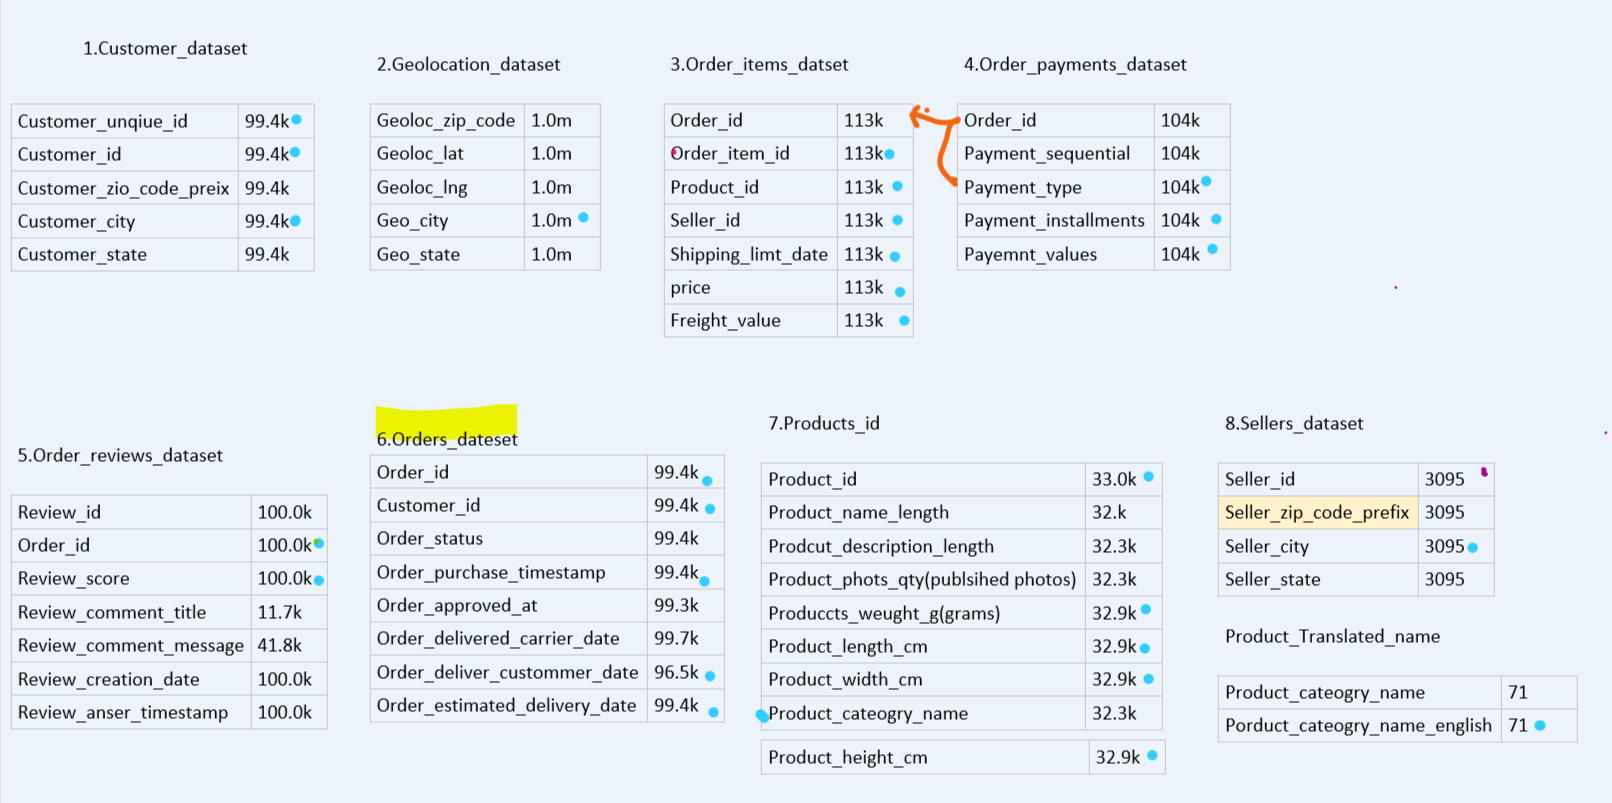

In [4]:
from IPython.display import Image
Image(filename='datablob.png') 

Loading the datasets

In [5]:
itemsdf=pd.read_csv(r"olist_order_items_dataset.csv")
ordersdf=pd.read_csv(r"olist_orders_dataset.csv")
prodsdf=pd.read_csv(r"olist_products_dataset.csv")


In [6]:
df1=itemsdf
df2=ordersdf
df3=prodsdf

In [7]:
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status   

Joining the two datasets using the inner join function like in sql.

In [8]:
newdf=pd.merge(df1,df2,on=["order_id"])
df=pd.merge(newdf,df3,on=["product_id"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

Dropping the object variables and keeping only the product name for our prediction

In [10]:
cleandf=df.drop(["shipping_limit_date","order_id","order_item_id","product_id","seller_id","shipping_limit_date","customer_id","order_purchase_timestamp","order_status","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date","product_description_lenght"],axis=1)

In [11]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  112650 non-null  float64
 1   freight_value          112650 non-null  float64
 2   product_category_name  111047 non-null  object 
 3   product_name_lenght    111047 non-null  float64
 4   product_photos_qty     111047 non-null  float64
 5   product_weight_g       112632 non-null  float64
 6   product_length_cm      112632 non-null  float64
 7   product_height_cm      112632 non-null  float64
 8   product_width_cm       112632 non-null  float64
dtypes: float64(8), object(1)
memory usage: 8.6+ MB


In [12]:
ddf=cleandf.dropna()

In [13]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111046 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  111046 non-null  float64
 1   freight_value          111046 non-null  float64
 2   product_category_name  111046 non-null  object 
 3   product_name_lenght    111046 non-null  float64
 4   product_photos_qty     111046 non-null  float64
 5   product_weight_g       111046 non-null  float64
 6   product_length_cm      111046 non-null  float64
 7   product_height_cm      111046 non-null  float64
 8   product_width_cm       111046 non-null  float64
dtypes: float64(8), object(1)
memory usage: 8.5+ MB


In [14]:
x,y=ddf.drop('product_category_name',axis=1),ddf.product_category_name
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


> # KNN

Using the KNN classfier from the sklearn.

In [15]:
from sklearn.linear_model import LinearRegression 
ols=KNeighborsClassifier()
modl=ols.fit(X_train,y_train)
pred_y=modl.predict(X_test)

## MODEL SCORE :

In [16]:
print(f'{round(modl.score(X_test,y_test)*100,3)} %')

71.216 %


## THE PREDICTED DATAFRAME FOR THE TEST DATA

In [18]:
X_test

,price,freight_value,product_name_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
99684,109.90,15.52,60.0,1.0,200.0,16.0,16.0,16.0
39512,35.00,15.10,47.0,2.0,150.0,18.0,2.0,16.0
24657,49.99,10.96,59.0,1.0,50.0,16.0,16.0,17.0
1434,99.99,27.24,54.0,1.0,1200.0,42.0,25.0,15.0
74997,139.90,47.51,57.0,2.0,3000.0,69.0,11.0,11.0
...,...,...,...,...,...,...,...,...
28158,60.00,16.18,47.0,1.0,600.0,38.0,5.0,33.0
42225,47.60,17.06,45.0,1.0,1650.0,22.0,14.0,14.0
66101,179.99,9.02,33.0,1.0,929.0,24.0,16.0,20.0
71093,79.90,19.75,51.0,6.0,750.0,16.0,18.0,16.0


In [19]:

finaldf=X_test


In [20]:

finaldf["predicted"]=pred_y


ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The predicted dataframe

In [21]:
finaldf

,price,freight_value,product_name_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,predicted
99684,109.90,15.52,60.0,1.0,200.0,16.0,16.0,16.0,esporte_lazer
39512,35.00,15.10,47.0,2.0,150.0,18.0,2.0,16.0,esporte_lazer
24657,49.99,10.96,59.0,1.0,50.0,16.0,16.0,17.0,automotivo
1434,99.99,27.24,54.0,1.0,1200.0,42.0,25.0,15.0,cool_stuff
74997,139.90,47.51,57.0,2.0,3000.0,69.0,11.0,11.0,moveis_decoracao
...,...,...,...,...,...,...,...,...,...
28158,60.00,16.18,47.0,1.0,600.0,38.0,5.0,33.0,livros_interesse_geral
42225,47.60,17.06,45.0,1.0,1650.0,22.0,14.0,14.0,construcao_ferramentas_jardim
66101,179.99,9.02,33.0,1.0,929.0,24.0,16.0,20.0,beleza_saude
71093,79.90,19.75,51.0,6.0,750.0,16.0,18.0,16.0,casa_construcao
